# MTH9875 Homework 2

## Chenyu Zhao

### R version: 3.5.1

Assigned: September 14, 2019.
Due: September 29, 2019 by 6pm.

Late homework **will not be accepted**.

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Allen Chen (allen.long.chen@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.

### The  volatility smile in a simple regime-switching model

#### 1. (10 points) 

Consider the simple regime-switching model from Lecture 2 where realized volatility over a one-year period can be either $10\%$ or $30\%$, each with probability $1/2$ (depending on an initial coin toss say).  The density of 1-year returns is given by the sum of the two corresponding normal densities (the forward price is equal to the spot price in each regime):


In [1]:
d3010 <- function(x){(dnorm(x,mean=-.1^2/2,sd=.1)+dnorm(x,mean=-.3^2/2,sd=.3))/2}

The following snippet loads Black-Scholes functions from Lecture 1.  Please use these in your solution.

In [2]:
download.file(url="http://mfe.baruch.cuny.edu/wp-content/uploads/2019/09/9875HW2.zip", destfile="9875HW2.zip")
unzip(zipfile="9875HW2.zip")

source("BlackScholes.R")

In [3]:
library(repr)
options(repr.plot.height=5)

(a) Code a function to return the price of a 1-year European option with log-strike $k$ in this model.  Your function should return the price as a fraction of the current stock price.

(b) Code a function to return the implied volatility 1-year European option with log-strike $k$ in this model.

(c) Draw the 1-year volatility smile in this model for log-strikes from -$2.0$ to $2.0$ with implied volatility on the y-axis and log-strike $k$ on the x-axis.  

(d) What is implied volatility at-the-money?  Give intuition as to why.

(e) In the extreme wings of the volatility smile, implied volatility tends to $30\%$ as the log-strike $|k| \to \infty$.  Why?

#### Answer

(a)

In [4]:
EuropeanCallOption<-function(k){
    return (0.5*BSFormula(1,exp(k),1,0,0.1)+0.5*BSFormula(1,exp(k),1,0,0.3))
}

(b)

In [5]:
EuropeanCallOptionIV<-function(k){
    CallPrice = EuropeanCallOption(k)
    return (BSImpliedVolCall(1, exp(k), 1, 0, CallPrice))
}

(c)

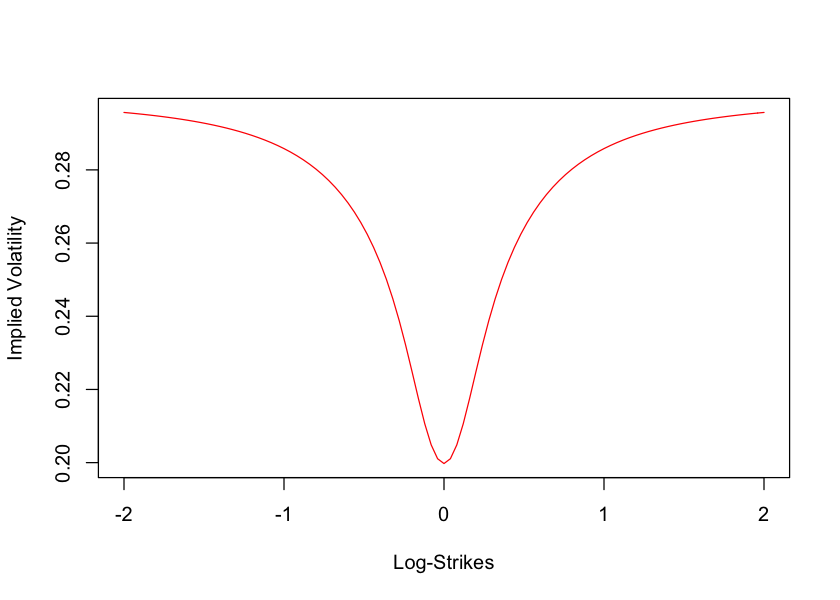

In [6]:
curve(EuropeanCallOptionIV(x),from=-2.0,to=2.0,xlab="Log-Strikes",ylab="Implied Volatility", col='red')

(d)

In [7]:
EuropeanCallOptionIV(0)

[1] 0.1997502

For ATM option, $K=S$, so $log(\frac{S}{K})=0$. For ATM option, the following approximation stands,

$$
C = \sqrt{\frac{T}{2\pi}}\sigma S
$$

which is a linear function of $\sigma$

And we have 

$$
C =0.5 C_{\sigma_1}+0.5 C_{\sigma_2}
$$

where $\sigma_1$ and $\sigma_2$ are 10% and 30%

So for ATM case, we have following approximation

$$
\sigma_{imp} = 0.5 \sigma_1 +0.5 \sigma_2 = 20\%
$$

(d)

When $|k|$ is very large, $BS(\sigma=0.3) \gg BS(\sigma=0.1)$. So $C \approx 0.5 C_{\sigma_2}$, which has the same magnitude with $C_{\sigma_2}$, and far greater than $C_{\sigma_1}$. 

When $|k|$ is very large, slight change in volatility has great influence in BS price. In this sense, C is still very close to $C_{\sigma_2}$, so the calculated implied volatility is very close to $\sigma_2$, which is 30%.

### Tanaka's formula
$$\newcommand{\supp}{\mathrm{supp}}
\newcommand{\EE}{\mathbb{E} }
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
$$
#### 2. (6 points)

By applying Itô's lemma as in the notes, prove Tanaka's formula in its usual form:

$$
\left|B_t\right|=\int_0^t\,\sgn(B_s)\,dB_s+L_t
$$
where $B_t$ is a standard Brownian motion, $\sgn$ denotes the sign function

$$
\sgn(x)=\left\{
\begin{array}{ll}
  +1&x \ge 0  \\
 -1 & x <0 
\end{array}
\right.
$$

and $L_t$ is its local time at $0$ (roughly the time spent by $B$ at $0$ before time $t$) given by the formal expression

$$
L_t=\int_0^t\,\delta(B_s)\,ds.
$$

Explain in words what this result means in terms of delta-hedging of a particular options position.


#### Answer

let $f=|B_t|$, by applying Ito formula

$$
d|B_t| = \frac{\partial |B_t|}{\partial B_t}dB_t+\frac{\partial^2 |B_t|}{\partial B_t^2}d[B,B](t) = sgn(B_t)dB_t + \delta(B_t)dt
$$

Integrate both side give

$$
|B_t|=\int_0^t sgn(B_x)dB_x + L_t
$$

where $L_t=\int_0^t \delta(B_s)ds$

The intuition behind this formula is, when $B_t$ is positive, we long one share, and when negative, we short a share. This will always give non-negative pnl without risk. So we have another local time term, to eliminate arbitrage.

## Local volatility and implied volatility

#### 3. (6 points) 

Using the BBF formula, prove the well-known rule of thumb that the local volatility skew is roughly twice the implied volatility skew for short expirations.  Formally, for small $T$,

$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}.
$$

#### Answer

For small T, we drop the $O(T)$ term and get $\sigma_{BS}(k,T)=\sigma_0(k)$

When k approaches 0, from BBF formula, we have $\frac{1}{\sigma_{BS}(k,T)}=\frac{1}{\sigma(k)}\int_0^1d\alpha$. Thus we have $\sigma_{BS}(k, T)\approx \sigma(k)$, given $T$ is small and $k \to 0$  

Take derivative to $\sigma$,

$$
\partial_k \sigma_{BS}(k,T)=\partial_k (\int_0^1\frac{d\alpha}{\sigma(\alpha k)})^{-1} = (\int_0^1\frac{d\alpha}{\sigma(\alpha k)})^{-2}\int_0^1\frac{d\alpha}{\sigma^2(\alpha k)}\frac{\partial \sigma(\alpha k)}{\partial k}=\sigma_{BS}^2(k,T)\int_0^1 \alpha \frac{\partial_k \sigma(\alpha k)}{\sigma^2(\alpha k)}d\alpha
$$

when k approaches 0, $\sigma(\alpha k) $ can be regarded as constant $\sigma(k)$, when $\alpha$ between 0 and 1. 

Thus

$$
\partial_k \sigma_{BS}(k,T) = \frac{\sigma_{BS}^2(k,T)}{\sigma^2(k)}\partial_k \sigma(k,T) \int_0^1\alpha d\alpha
$$

take $\sigma_{BS}(k, T)\approx \sigma(k)$ into account, we have 

$$
\left.\partial_k \sigma(k,T)\right|_{k=0} \approx 2\, \left.\partial_k \sigma_{BS}(k,T)\right|_{k=0}.
$$

#### 4. (6 points) 

Consider formula (12) from Lecture 2:

$$
v_\ell(k,T) = \frac{\frac{\partial w}{\partial T}}
{\left(1 -\frac 12\frac{k}{w}\,\frac{\partial w}{\partial k}\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{w} \right)\,
 \left( \frac{\partial w}{\partial k} \right)^2  +
\frac{1}{2}\,\frac{\partial^2 w}{\partial k^2 }}.
$$

Using this formula, show that the simple quadratic parameterization

$$
w(k,T)=\alpha(T)+\beta(T)\,{k}+\gamma(T)\,{k^2}
$$

with $\alpha(T)>0$ and $\gamma(T)>0$ is arbitrageable.  Explain your result in words in terms of option strategies.

#### Answer

$$
v_\ell(k,T) = \frac{\alpha' + \beta' k+\gamma' k^2}
{\left(1 -\frac 12\frac{k}{\alpha+\beta k +\gamma k^2}\,(\beta + 2\gamma k)\right)^2
 - \frac14\,\left( \frac{1}{4} + \frac{1}{\alpha+\beta k +\gamma k^2} \right)\,
 (\beta + 2\gamma k)^2  +
\gamma}
$$

when k is large enough, we drop the lower magnitude term and have

$$
v_\ell(k,T) \approx \frac{\gamma' k^2}{-\frac14\gamma^2k^2} = -4\frac{\gamma'}{\gamma}<0
$$

So for large enough k, the volatility is negative, which is impossible, and indicate the arbitrageable of  volatility surface. The denominator of this formula comes from $\frac{\partial^2C}{\partial k^2}$. If negative, means we can use butterfly strategy to arbitrage. 